# MATH 210 Introduction to Mathematical Computing

## November 16, 2020

* Higher order differential equations as first order systems
* ODE solvers in `scipy.integrate`

## Higer order equations as first order systems

Any higher order system of equations is equivalent to a first order system in higher dimension.

For example, consider a second order constant coefficient equation

$$
ay'' + by' + cy = F(t)
$$

Introduce new variables $u_0 = y$ and $u_1 = y'$ and write equations for the derivatives

\begin{align*}
u_0' &= u_1 \\
u_1' &= (F(t) - cu_0 - bu_1)/a
\end{align*}

Let's do another example. Consider a planet orbiting the Sun. Let $(x(t),y(t))$ be the position of the planet at time $t$ where the Sun is at $(0,0)$. The equation of motion from Newton's Law become

\begin{align*}
m_P x'' &= - \frac{G m_S m_P}{x^2 + y^2} \frac{x}{\sqrt{x^2 + y^2}} \\
m_P y'' &= - \frac{G m_S m_P}{x^2 + y^2} \frac{y}{\sqrt{x^2 + y^2}} \\
\end{align*}

where $G$ is the gravitational constant, $m_S$ is the mass of the Sun and $m_P$ is the mass of the planet. If we measure time in years, distance in AU (astronomical unit, distance from Earth to the Sun) and mass in solar mass (multiples of our Earth's Sun), then $G = 4 \pi^2$ and so

\begin{align*}
x'' &= - \frac{4 \pi^2}{x^2 + y^2} \frac{x}{\sqrt{x^2 + y^2}} \\
y'' &= - \frac{4 \pi^2}{x^2 + y^2} \frac{y}{\sqrt{x^2 + y^2}} \\
\end{align*}

Write this as a first order system. Introduce new variables

\begin{align*}
u_0 &= x \\
u_1 &= x' \\
u_2 &= y \\
u_3 &= y' \\
\end{align*}

and write

\begin{align*}
u_0' &= u_1 \\
u_1' &= - \frac{4 \pi^2}{u_0^2 + u_2^2} \frac{u_0}{\sqrt{u_0^2 + u_2^2}} \\
u_2' &= u_3 \\
u_3' &= - \frac{4 \pi^2}{u_0^2 + u_2^2} \frac{u_2}{\sqrt{u_0^2 + u_2^2}}
\end{align*}

## scipy.integrate

Review the documentation for [scipy.integrate.odeint](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi

In [2]:
def odefun(u,t):
    dudt = np.array([0.,0.,0.,0.])
    d = np.sqrt(u[0]**2 + u[2]**2)
    dudt[0] = u[1]
    dudt[1] = -4*np.pi**2*u[0]/d**3
    dudt[2] = u[3]
    dudt[3] = -4*np.pi**2*u[2]/d**3
    return dudt

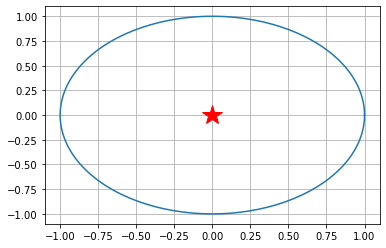

In [3]:
u0 = [1,0,0,2*np.pi]
t = np.linspace(0,1,200)
u = spi.odeint(odefun,u0,t)
plt.plot(u[:,0],u[:,2])
plt.plot(0,0,'r*',ms=20)
plt.grid(True)
plt.show()

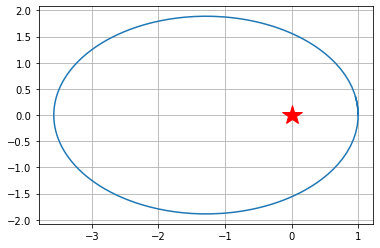

In [4]:
u0 = [1,0,0,2.5*np.pi]
t = np.linspace(0,3.5,200)
u = spi.odeint(odefun,u0,t)
plt.plot(u[:,0],u[:,2])
plt.plot(0,0,'r*',ms=20)
plt.grid(True)
plt.show()

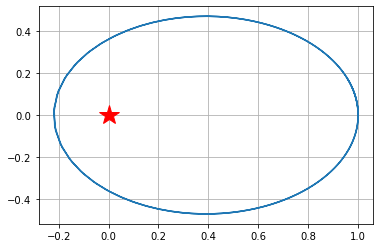

In [5]:
u0 = [1,0,0,1.2*np.pi]
t = np.linspace(0,1,200)
u = spi.odeint(odefun,u0,t)
plt.plot(u[:,0],u[:,2])
plt.plot(0,0,'r*',ms=20)
plt.grid(True)
plt.show()